In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [132]:
data = pd.read_csv('/Users/abhi/Desktop/End to End ML/Notebook[EDA-Model]/Data/insurance fraud claims.csv')

In [137]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [134]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [135]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [136]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [138]:
#Drop irrelevant columns
df = data.drop(columns=['_c39'])

In [140]:
df.sample(2)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
565,392,50,556415,1991-08-22,OH,100/300,2000,1108.97,0,431496,...,2,YES,108030,16620,16620,74790,Saab,92x,2002,N
798,46,24,718829,1999-02-21,OH,250/500,2000,1568.47,4000000,454480,...,0,?,56600,11320,5660,39620,Toyota,Camry,1999,N


In [141]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i,":", df[i].nunique())

policy_bind_date : 951
policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 4
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 3
police_report_available : 3
auto_make : 14
auto_model : 39
fraud_reported : 2


In [142]:
df.policy_state.unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [143]:
df.incident_type.unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [148]:
df.authorities_contacted.unique()

array(['Police', nan, 'Fire', 'Other', 'Ambulance'], dtype=object)

In [144]:
df.police_report_available.unique()

array(['YES', '?', 'NO'], dtype=object)

In [145]:
df.replace('?',np.nan,inplace=True)

In [147]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted           91
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [188]:
numerical_df = df.select_dtypes(include = ['int64'])

In [189]:
categorical_df = df.select_dtypes(include = ['object'])

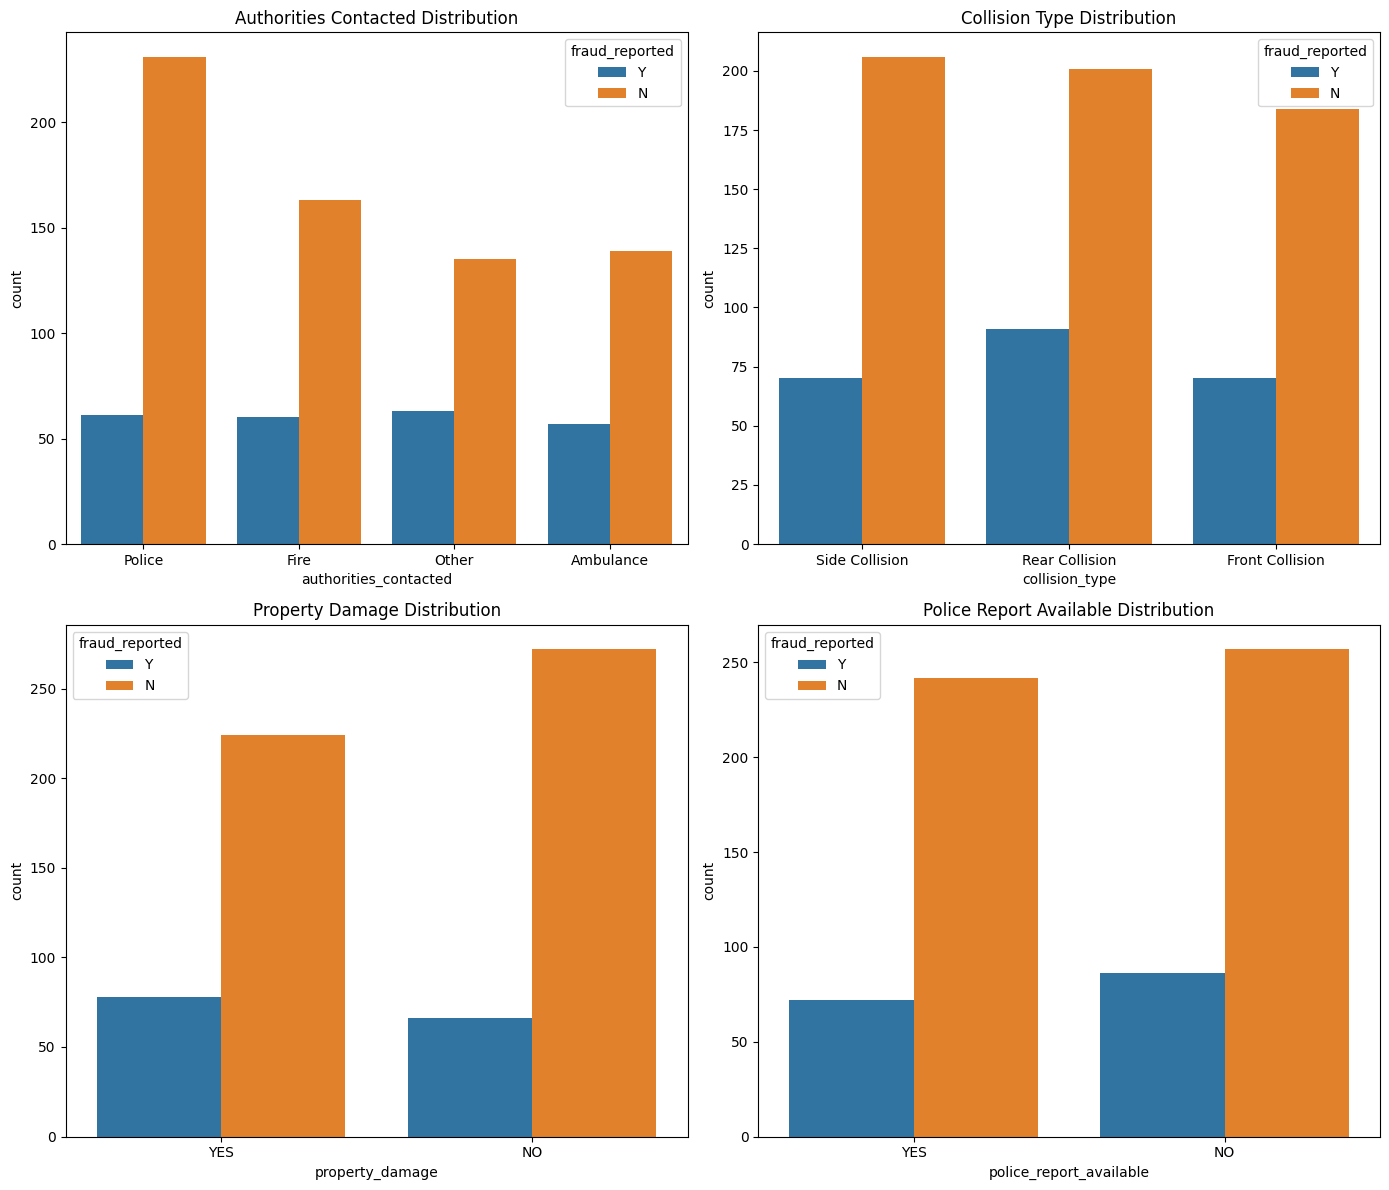

In [152]:
# Subset of the dataset for the columns of interest with missing or placeholder values
columns_of_interest = ['authorities_contacted', 'collision_type', 'property_damage', 'police_report_available', 'fraud_reported']
data_subset = df[columns_of_interest]


# Plotting distributions of the categorical data and their relationship with fraud_reported
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.countplot(data=data_subset, x='authorities_contacted', hue='fraud_reported', ax=axes[0, 0])
sns.countplot(data=data_subset, x='collision_type', hue='fraud_reported', ax=axes[0, 1])
sns.countplot(data=data_subset, x='property_damage', hue='fraud_reported', ax=axes[1, 0])
sns.countplot(data=data_subset, x='police_report_available', hue='fraud_reported', ax=axes[1, 1])

axes[0, 0].set_title('Authorities Contacted Distribution')
axes[0, 1].set_title('Collision Type Distribution')
axes[1, 0].set_title('Property Damage Distribution')
axes[1, 1].set_title('Police Report Available Distribution')

plt.tight_layout()
plt.show()


In [154]:
# Determine the mode (most frequent value) for 'authorities_contacted' and 'collision_type'
mode_authorities = df['authorities_contacted'].mode()[0]
mode_collision = df['collision_type'].mode()[0]

# Impute missing values in 'authorities_contacted' with the mode
df['authorities_contacted'].fillna(mode_authorities, inplace=True)

# Impute missing values in 'collision_type' with the mode
df['collision_type'].fillna(mode_collision, inplace=True)

# Replace '?' with 'Not Reported' in 'property_damage'
# This accounts for potentially unreported damage, which is different from a categorical 'NO'
df['property_damage'].fillna('Not Reported', inplace=True)

# Replace '?' with 'Not Reported' in 'police_report_available'
# Similarly, this treats unreported cases distinctly from a simple 'NO'
df['police_report_available'].fillna('Not Reported', inplace=True)

# Check the counts to verify imputation
print(df['authorities_contacted'].value_counts())
print(df['collision_type'].value_counts())
print(df['property_damage'].value_counts())
print(df['police_report_available'].value_counts())


authorities_contacted
Police       383
Fire         223
Other        198
Ambulance    196
Name: count, dtype: int64
collision_type
Rear Collision     470
Side Collision     276
Front Collision    254
Name: count, dtype: int64
property_damage
Not Reported    360
NO              338
YES             302
Name: count, dtype: int64
police_report_available
Not Reported    343
NO              343
YES             314
Name: count, dtype: int64


In [156]:
df.sample(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
784,335,48,440616,1995-09-06,IL,500/1000,2000,1017.97,0,441671,...,0,YES,35860,3260,6520,26080,BMW,X5,2005,Y
868,242,44,664732,2003-07-30,IL,500/1000,2000,1396.89,6000000,618127,...,2,YES,66900,6690,13380,46830,Suburu,Forrestor,1999,Y
983,17,39,774895,2006-10-28,IL,250/500,1000,840.95,0,431202,...,1,Not Reported,3440,430,430,2580,Suburu,Legacy,2002,N


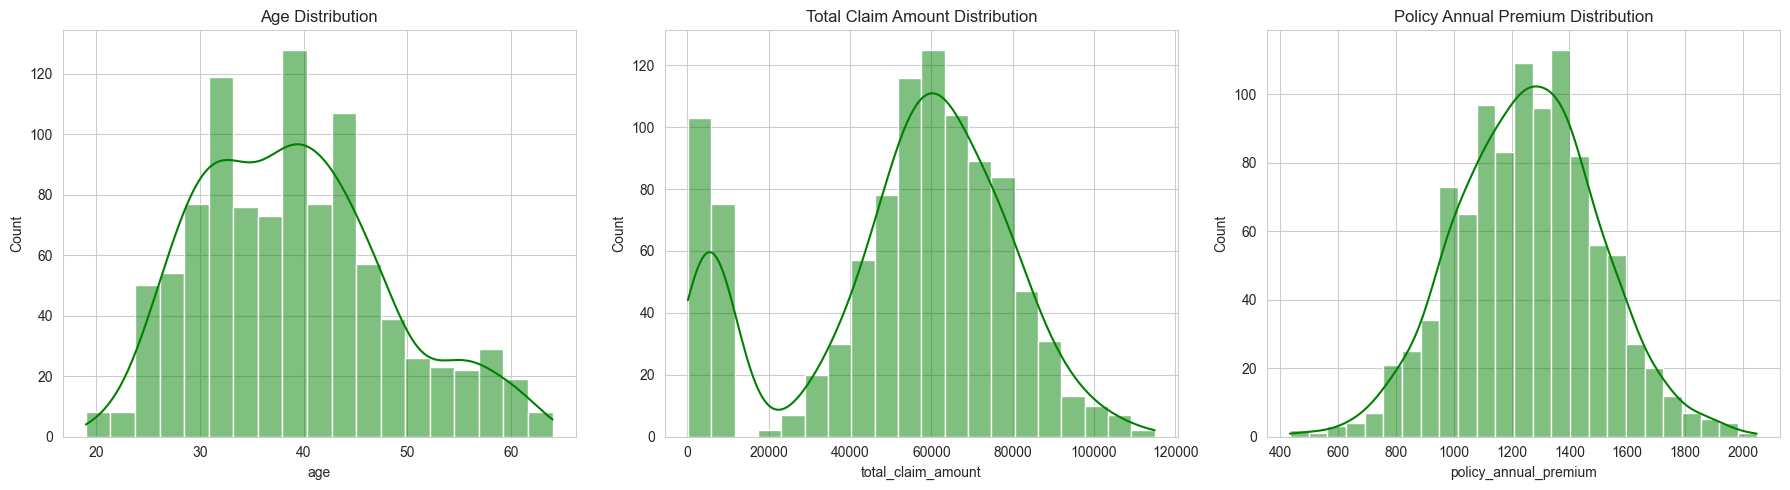

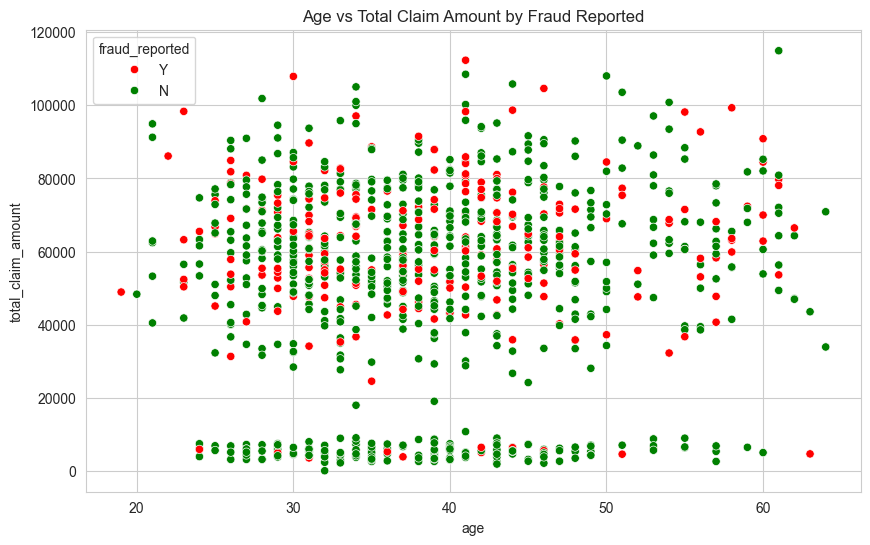

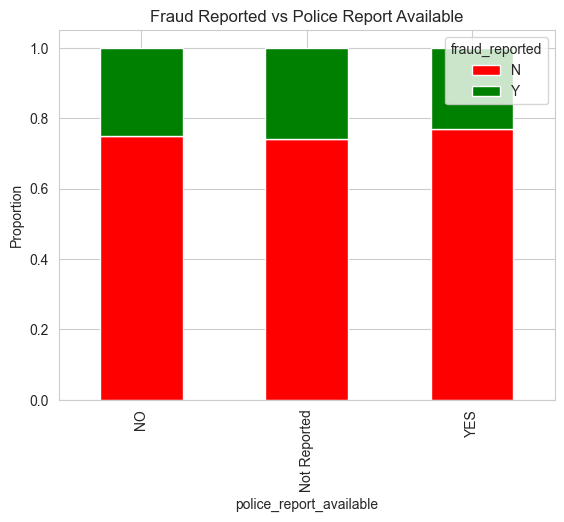

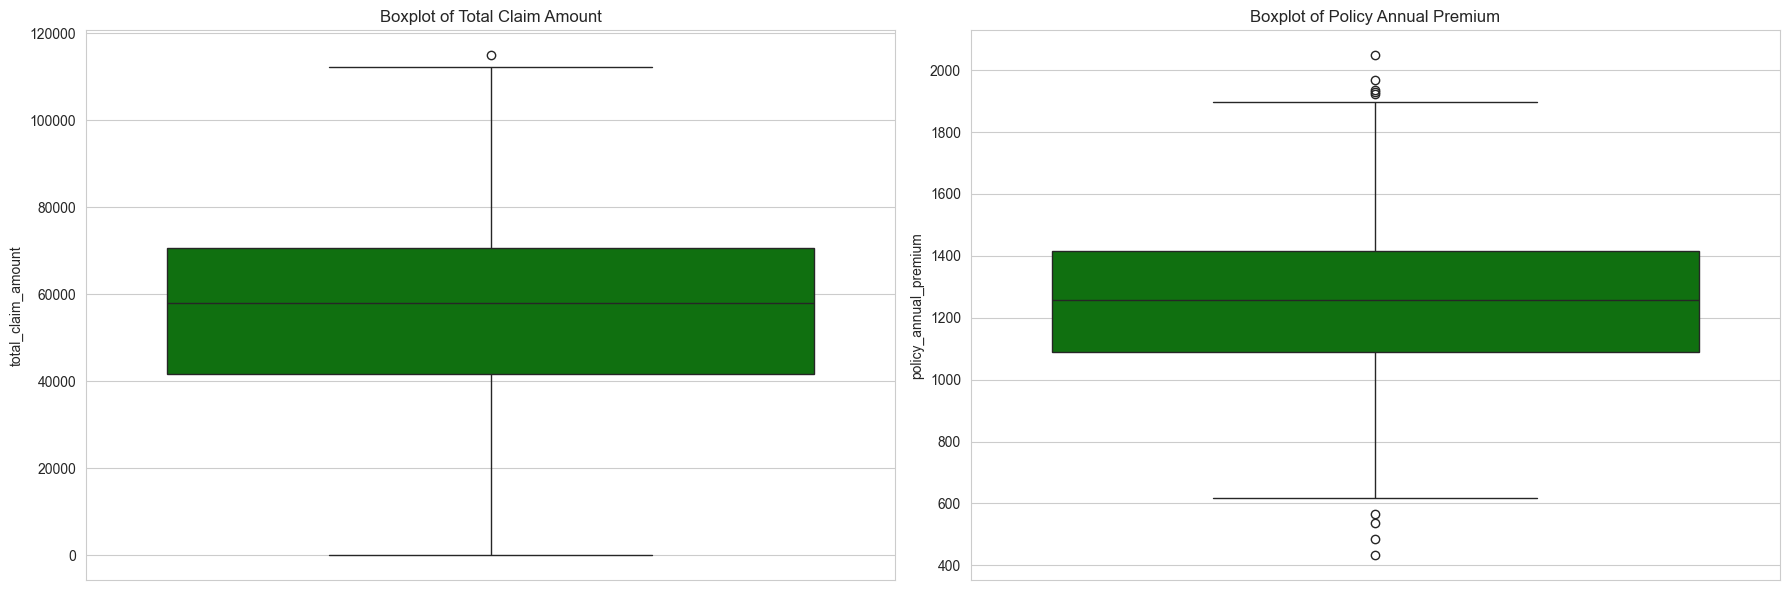

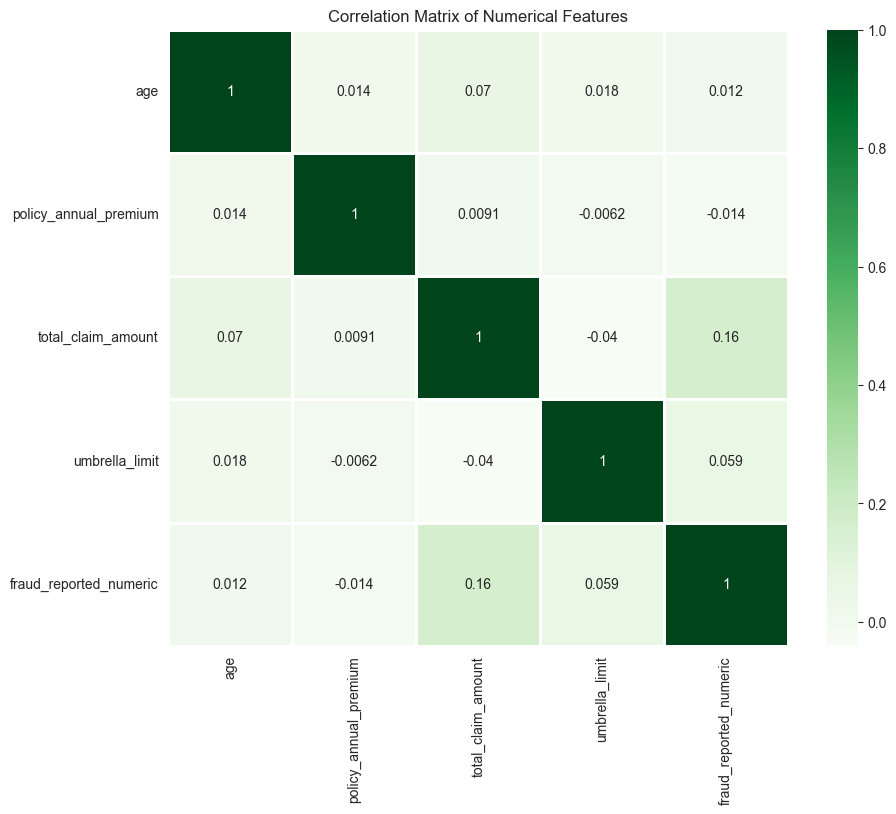

In [161]:
# Convert 'fraud_reported' to a numeric format for easier analysis
df['fraud_reported_numeric'] = df['fraud_reported'].apply(lambda x: 1 if x == 'Y' else 0)

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Univariate Analysis: Histograms for 'age', 'total_claim_amount', and 'policy_annual_premium'
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df, x='age', color='green', kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df, x='total_claim_amount', color='green', kde=True)
plt.title('Total Claim Amount Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df, x='policy_annual_premium', color='green', kde=True)
plt.title('Policy Annual Premium Distribution')

plt.tight_layout()
plt.show()

# Bivariate Analysis: Scatter plot for age vs total claim amount
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='total_claim_amount', hue='fraud_reported', palette=['red', 'green'])
plt.title('Age vs Total Claim Amount by Fraud Reported')
plt.show()

# Stacked bar chart for police report available vs fraud reported
fraud_vs_police_report = pd.crosstab(df['police_report_available'], df['fraud_reported'])
fraud_vs_police_report.div(fraud_vs_police_report.sum(1), axis=0).plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title('Fraud Reported vs Police Report Available')
plt.ylabel('Proportion')
plt.show()

# Outliers Detection: Boxplots for 'total_claim_amount' and 'policy_annual_premium'
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='total_claim_amount', color='green')
plt.title('Boxplot of Total Claim Amount')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='policy_annual_premium', color='green')
plt.title('Boxplot of Policy Annual Premium')

plt.tight_layout()
plt.show()

# Correlation Analysis: Heatmap of numerical features
numerical_features = ['age', 'policy_annual_premium', 'total_claim_amount', 'umbrella_limit', 'fraud_reported_numeric']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

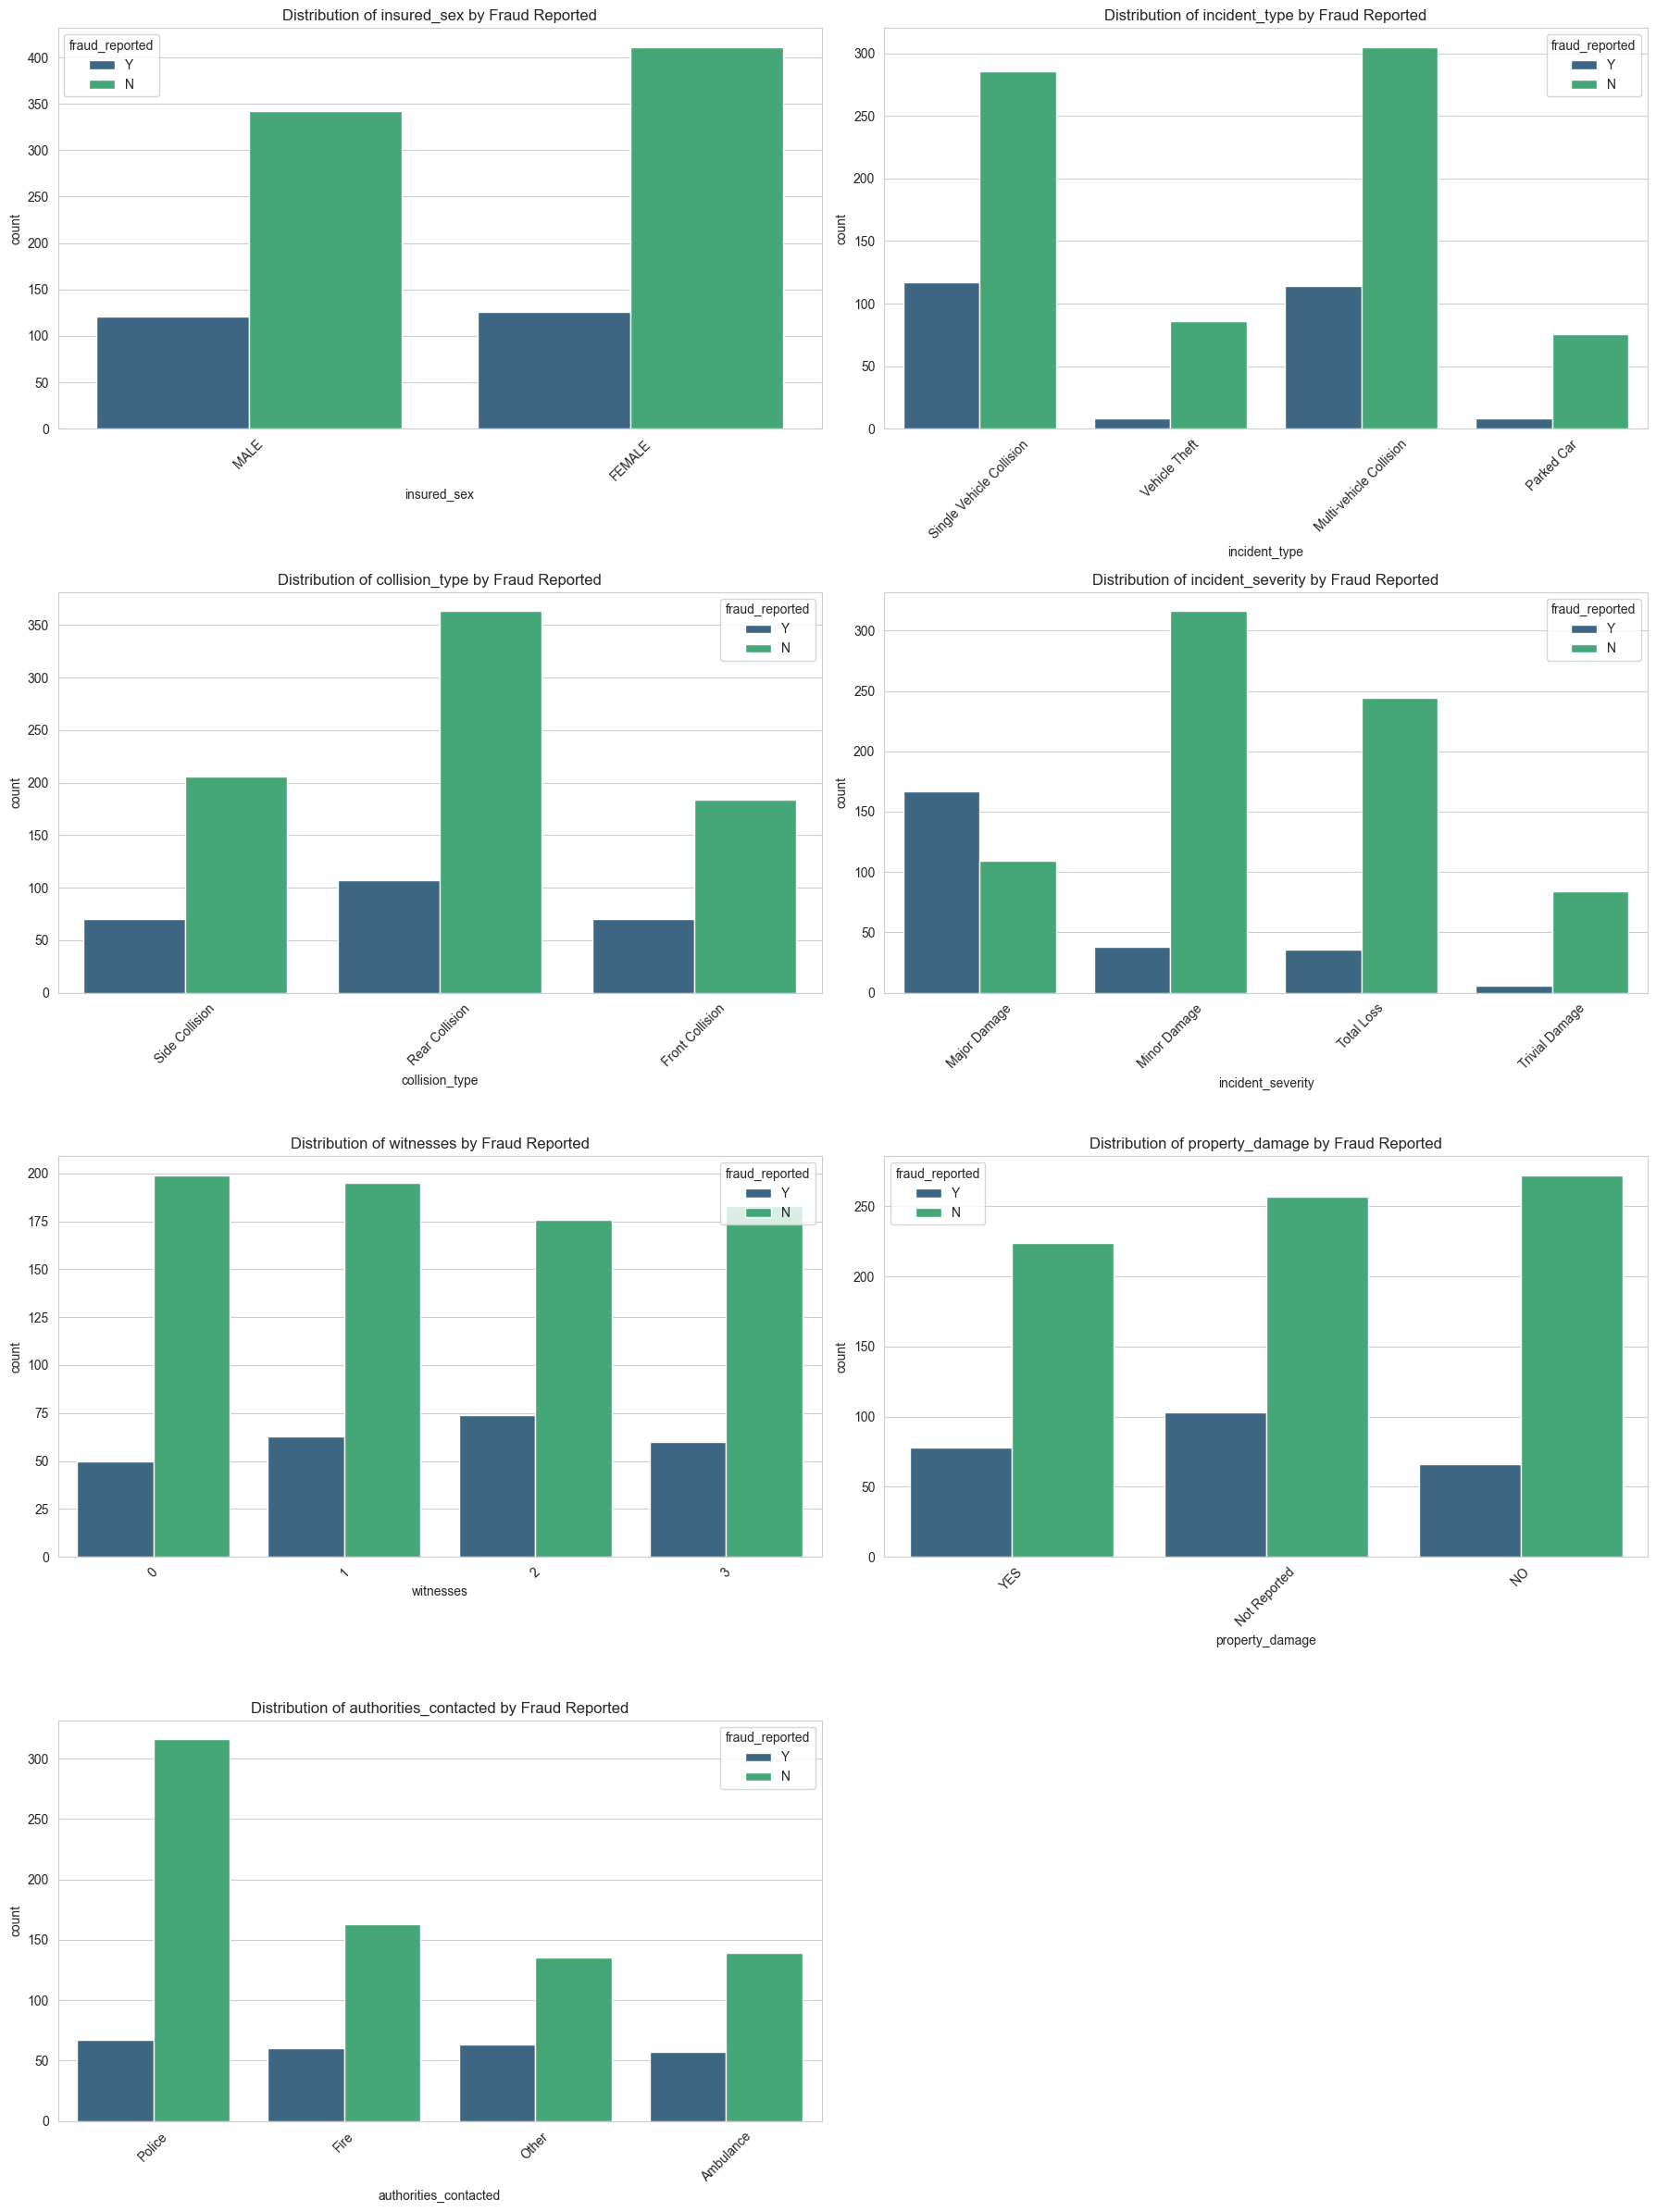

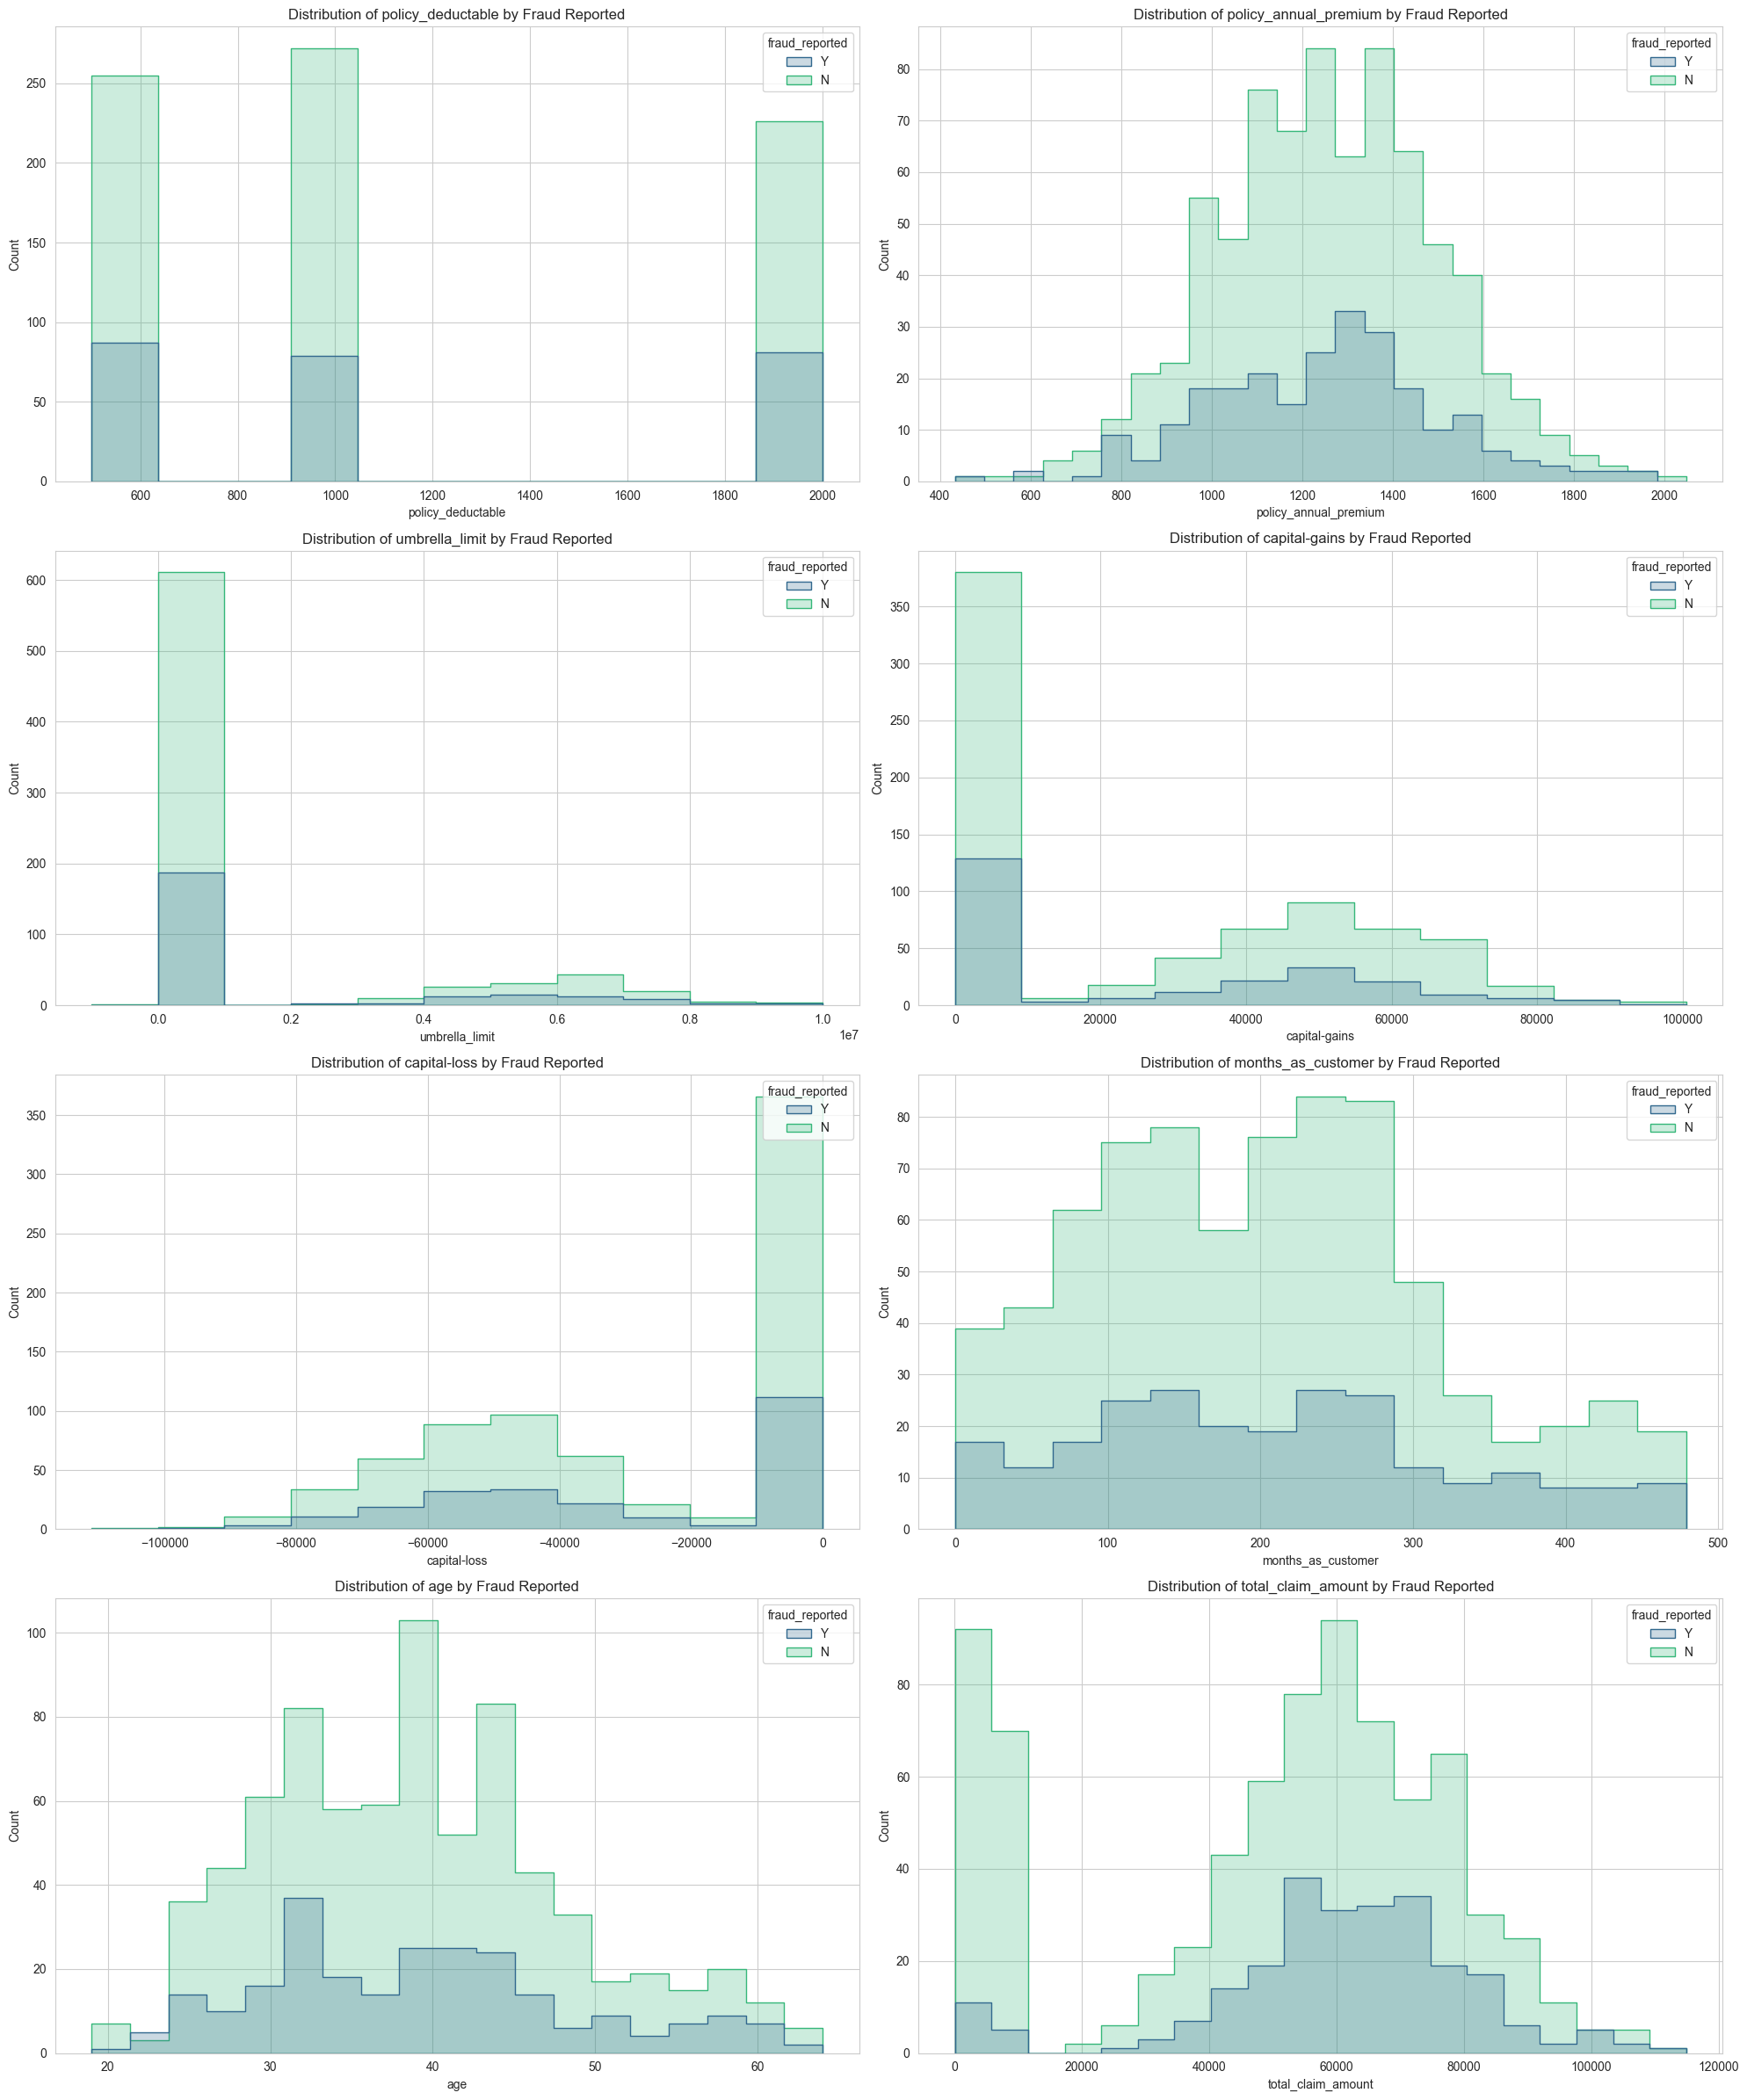

In [166]:
# Define categorical and numerical columns
cp_columns = ['insured_sex', 'incident_type', 'collision_type', 'incident_severity', 'witnesses', 'property_damage', 'authorities_contacted']
hp_columns = ['policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'capital-gains', 'capital-loss', 'months_as_customer', 'age', 'total_claim_amount']

# Plotting for categorical variables
plt.figure(figsize=[18, 24])
for index, column in enumerate(cp_columns):
    plt.subplot(4, 2, index + 1)  # Adjust the grid definition
    sns.countplot(data=df, x=column, hue='fraud_reported', palette='viridis')
    plt.title(f'Distribution of {column} by Fraud Reported')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting for numerical variables
plt.figure(figsize=[20, 24])
for index, column in enumerate(hp_columns):
    plt.subplot(4, 2, index + 1)  # Adjust the grid definition
    sns.histplot(df, x=column, hue='fraud_reported', element='step', palette='viridis')
    plt.title(f'Distribution of {column} by Fraud Reported')
plt.tight_layout()
plt.show()

In [167]:
df['policy_annual_premium'] = df['policy_annual_premium'].astype('int64')

In [168]:
df['fraud_reported'] = pd.get_dummies(df['fraud_reported'],drop_first=True,dtype=np.int64)

In [169]:
df.sample(3)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,fraud_reported_numeric
908,285,44,844117,1991-08-21,OH,250/500,2000,1144,0,609458,...,Not Reported,5500,500,500,4500,Honda,Civic,2010,0,0
302,48,44,297816,1997-02-03,IL,100/300,2000,1400,0,611118,...,Not Reported,87300,17460,17460,52380,Jeep,Wrangler,2013,0,0
914,140,36,117862,2000-07-14,OH,500/1000,2000,979,0,436364,...,YES,72800,14560,14560,43680,Honda,Accord,1998,0,0


In [170]:
df.fraud_reported_numeric.unique()

array([1, 0])

In [171]:
df['fraud_reported_numeric'].value_counts()

fraud_reported_numeric
0    753
1    247
Name: count, dtype: int64

<Axes: >

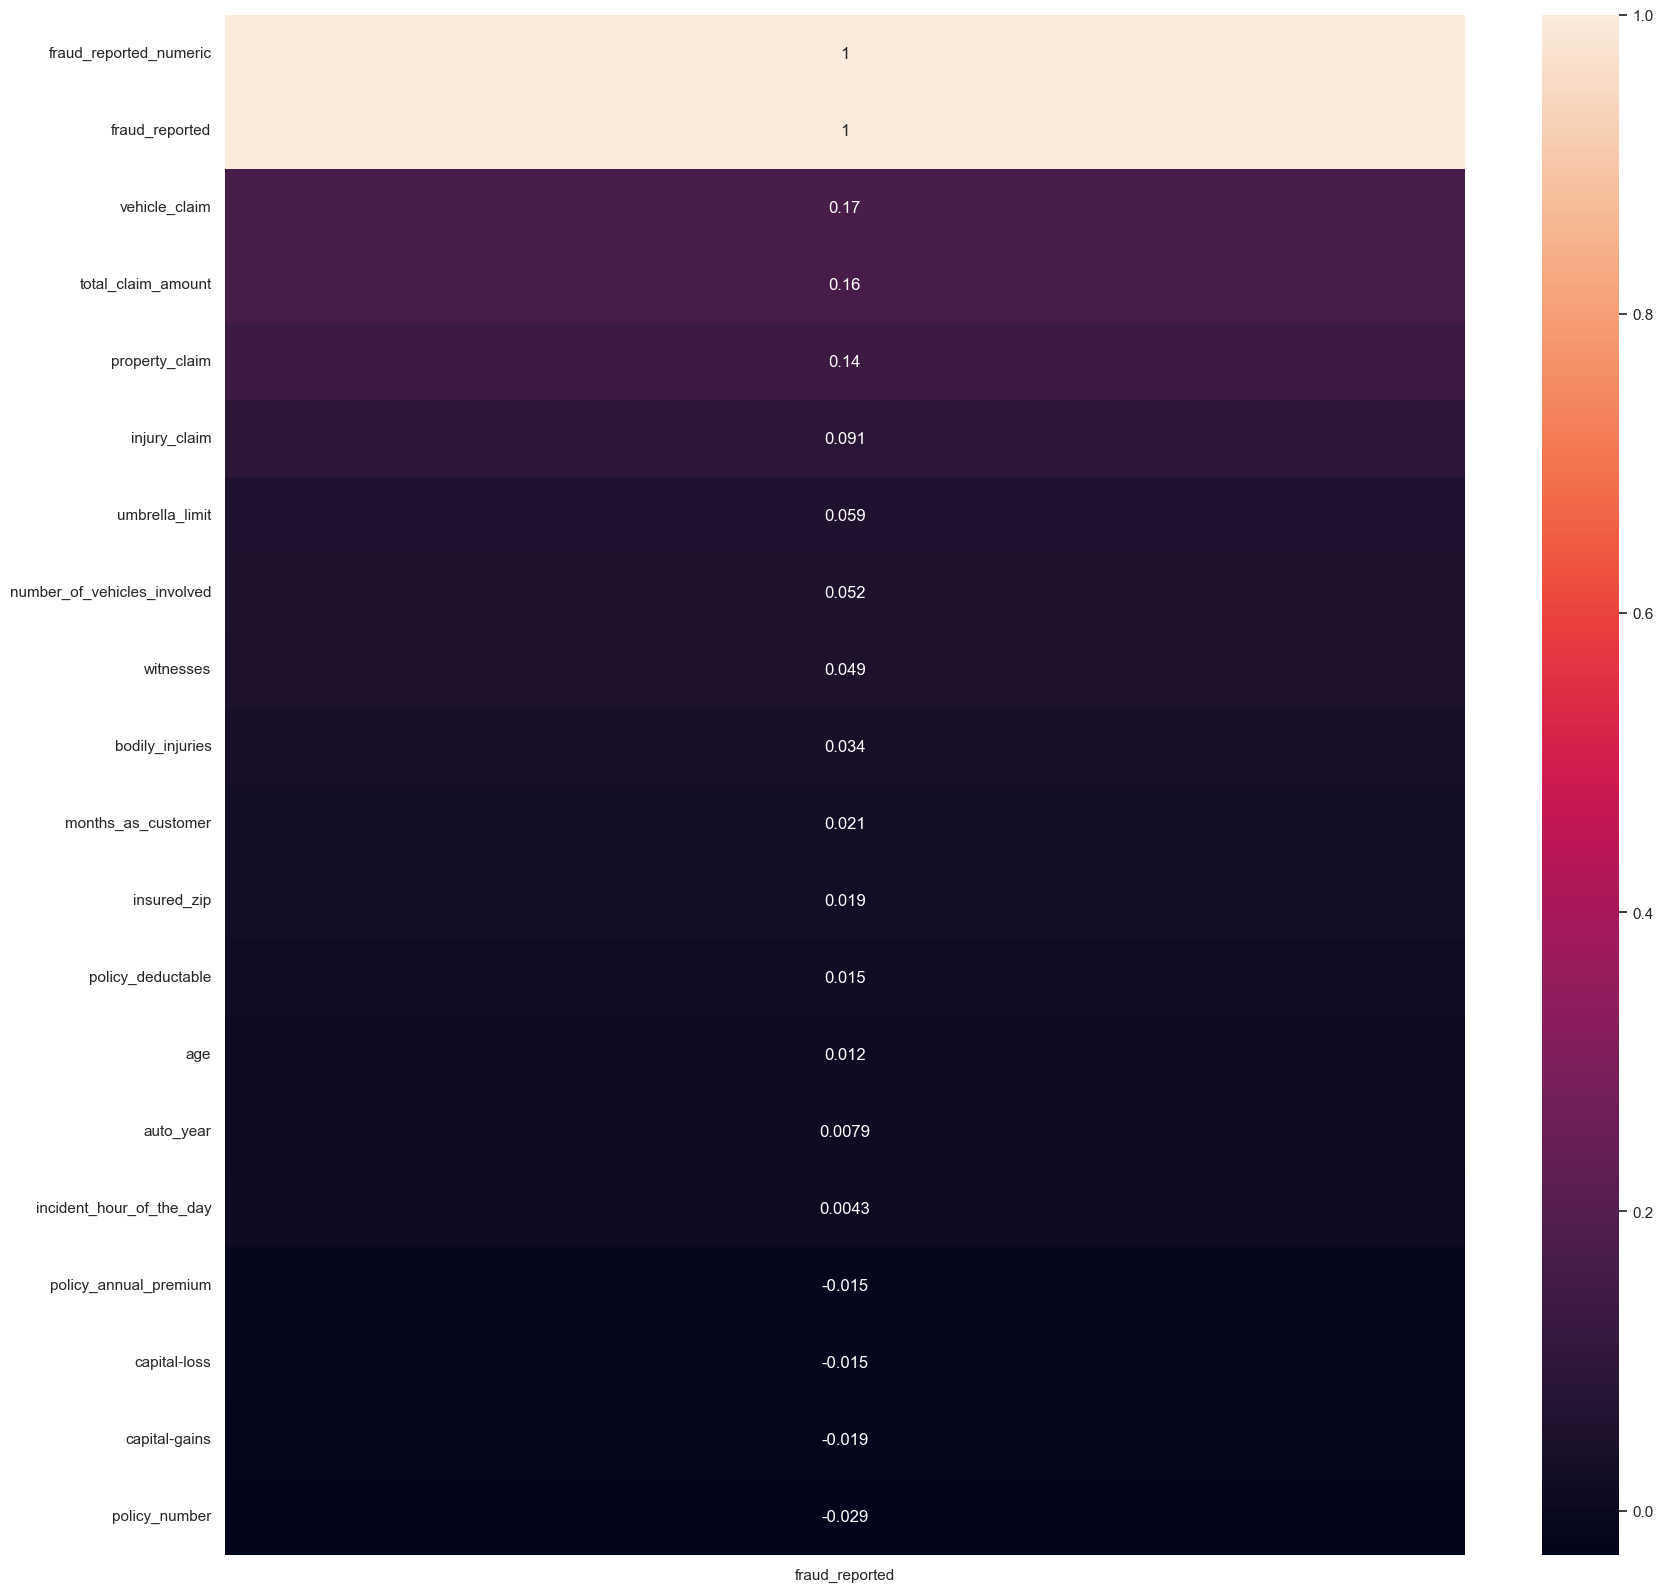

In [190]:
sns.heatmap(numerical_df.corr()[['fraud_reported']].nlargest(40,'fraud_reported'),annot=True)

In [191]:
numerical_df.sample(3)

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,fraud_reported_numeric
939,279,45,598308,2000,1333,6000000,620819,61100,-30700,21,3,1,0,61050,11100,11100,38850,2011,1,1
354,77,27,797934,2000,966,0,471704,56400,-32800,1,3,0,0,67200,6720,6720,53760,1995,0,0
987,235,39,836349,2000,1453,4000000,619570,0,0,10,1,0,3,60320,9280,9280,41760,2012,1,1


In [193]:
categorical_df.sample(10)

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model
411,2003-04-09,OH,250/500,FEMALE,High School,machine-op-inspct,video-games,not-in-family,2015-02-12,Parked Car,Rear Collision,Trivial Damage,Police,SC,Arlington,3693 Pine Ave,YES,YES,BMW,3 Series
201,1998-04-07,OH,250/500,MALE,PhD,transport-moving,base-jumping,not-in-family,2015-02-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,WV,Hillsdale,6149 Best Ridge,Not Reported,YES,Suburu,Legacy
934,1990-09-21,OH,100/300,FEMALE,College,armed-forces,camping,own-child,2015-02-03,Multi-vehicle Collision,Rear Collision,Major Damage,Ambulance,VA,Riverwood,1110 4th Drive,NO,Not Reported,Toyota,Highlander
989,2007-07-04,IN,250/500,FEMALE,High School,exec-managerial,movies,husband,2015-02-15,Multi-vehicle Collision,Rear Collision,Total Loss,Police,SC,Arlington,9682 Cherokee Ridge,YES,Not Reported,Chevrolet,Malibu
421,1992-10-02,IN,250/500,MALE,MD,prof-specialty,video-games,other-relative,2015-01-14,Single Vehicle Collision,Front Collision,Total Loss,Ambulance,SC,Northbend,6717 Best Drive,Not Reported,NO,Toyota,Camry
959,1991-05-05,OH,500/1000,FEMALE,High School,protective-serv,movies,husband,2015-02-04,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Hillsdale,7405 Oak St,NO,YES,Saab,92x
594,2009-09-19,OH,250/500,MALE,High School,sales,sleeping,wife,2015-01-09,Multi-vehicle Collision,Side Collision,Major Damage,Fire,SC,Hillsdale,5894 Flute Drive,NO,YES,Mercedes,ML350
154,2012-06-23,OH,100/300,FEMALE,Masters,other-service,reading,own-child,2015-02-24,Multi-vehicle Collision,Rear Collision,Minor Damage,Ambulance,NC,Northbrook,5621 4th Ave,NO,Not Reported,Saab,93
492,1998-03-16,OH,250/500,MALE,MD,machine-op-inspct,camping,wife,2015-01-17,Multi-vehicle Collision,Side Collision,Major Damage,Other,NY,Northbrook,6479 Francis Ave,NO,NO,Saab,95
949,1996-03-11,OH,100/300,FEMALE,PhD,tech-support,bungie-jumping,wife,2015-02-08,Multi-vehicle Collision,Side Collision,Total Loss,Police,WV,Arlington,1806 Weaver Ridge,Not Reported,YES,Ford,Escape


insured_sex has 2 unique categories.
incident_type has 4 unique categories.
collision_type has 3 unique categories.
incident_severity has 4 unique categories.
authorities_contacted has 4 unique categories.
policy_state has 3 unique categories.
insured_education_level has 7 unique categories.
insured_occupation has 14 unique categories.
insured_hobbies has 20 unique categories.
insured_relationship has 6 unique categories.
incident_state has 7 unique categories.
incident_city has 7 unique categories.
auto_make has 14 unique categories.
auto_model has 39 unique categories.


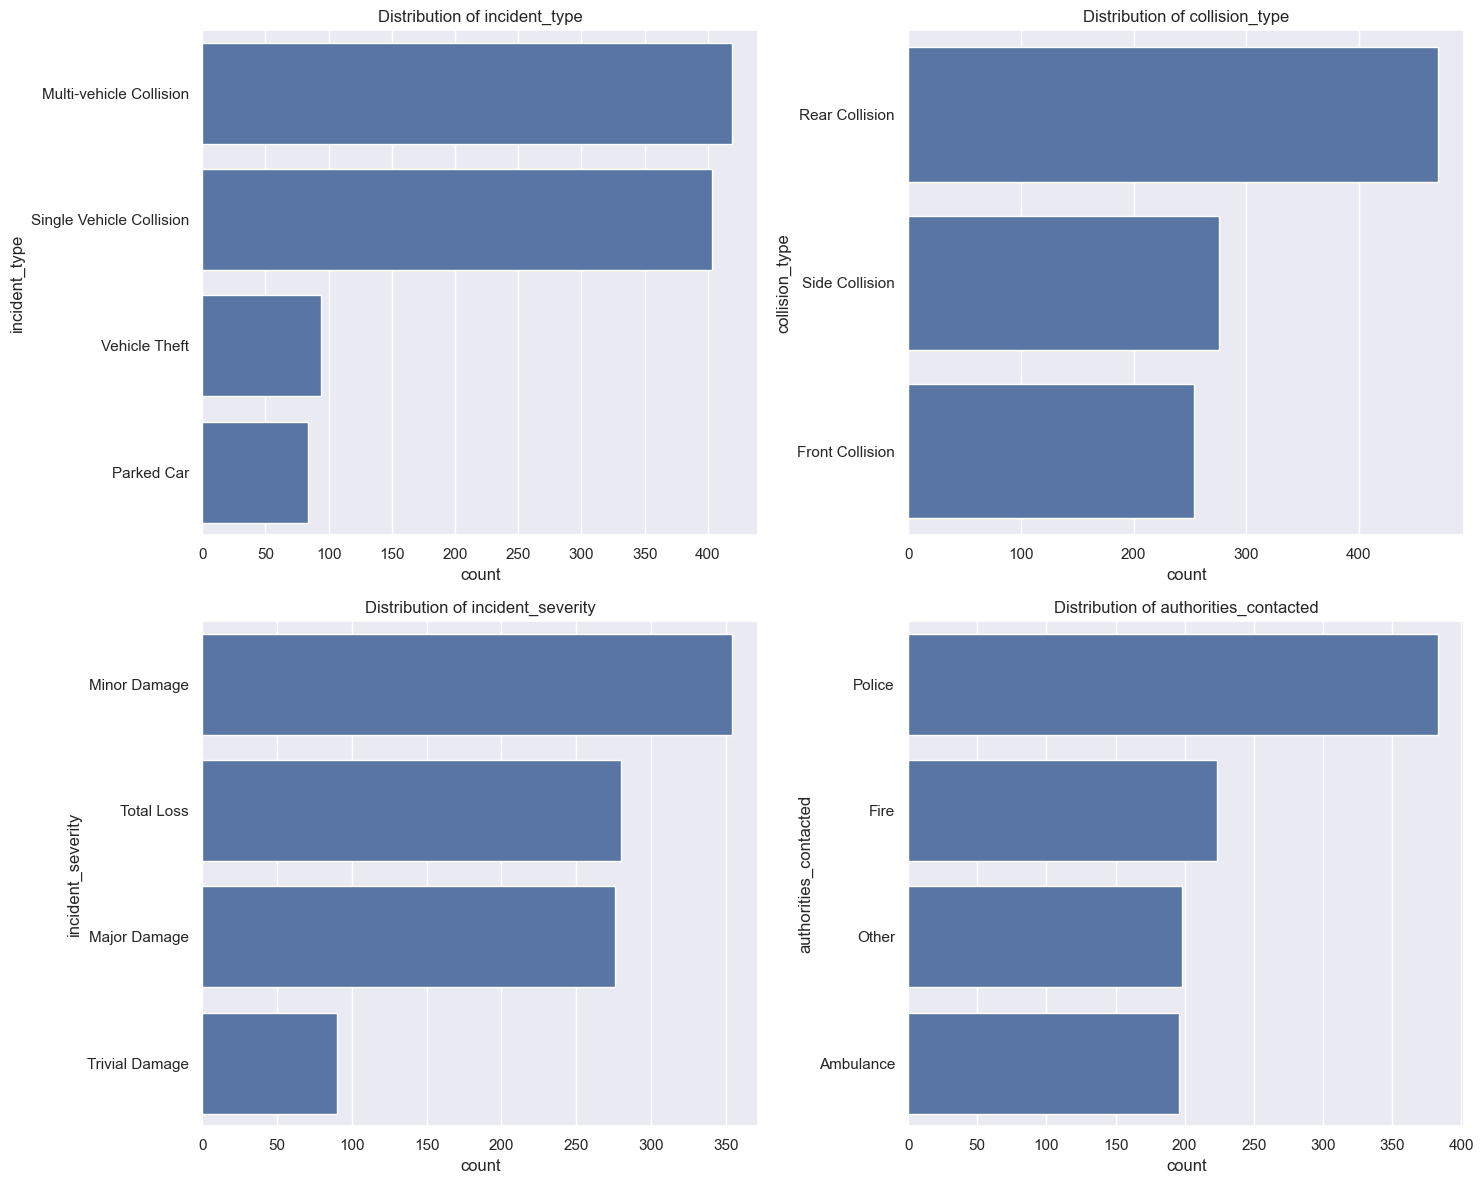

In [194]:
# Analyzing the number of unique values and visualizing distribution for select categorical variables
categorical_vars = ['insured_sex', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'policy_state', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_state', 'incident_city', 'auto_make', 'auto_model']

# Print the number of unique values for each categorical variable
for var in categorical_vars:
    unique_count = df[var].nunique()
    print(f'{var} has {unique_count} unique categories.')

# Visualizing distributions for a subset
plt.figure(figsize=(15, 12))
for i, var in enumerate(['incident_type', 'collision_type', 'incident_severity', 'authorities_contacted']):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, y=var, order = df[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.tight_layout()
plt.show()

In [198]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_occupation',
       'insured_hobbies', 'capital-gains', 'capital-loss', 'incident_date',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'fraud_reported_numeric',
       'insured_sex_FEMALE', 'insured_sex_MALE',
       'incident_type_Multi-vehicle Collision', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft',
       'collision_type_Front Collision', 'collision_type_Rear Collision',
       'collision_type_Side Collision', 'incident_severity_Major Damage',
       'incident_se

In [197]:
from category_encoders import TargetEncoder
# One-Hot Encoding for low cardinality
one_hot_cols = ['insured_sex', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'policy_state', 'insured_education_level', 'incident_state', 'incident_city', 'insured_relationship']
df = pd.get_dummies(df, columns=one_hot_cols)

# Target Encoding for medium to high cardinality
target_enc_cols = ['insured_occupation', 'auto_make', 'insured_hobbies']
encoder = TargetEncoder()
df[target_enc_cols] = encoder.fit_transform(df[target_enc_cols], df['fraud_reported'])

# Frequency Encoding for very high cardinality
freq_enc_cols = ['auto_model']
for col in freq_enc_cols:
    freq = df[col].value_counts() / len(data)
    df[col] = df[col].map(freq)

# Show the transformed dataset
print(df.head())

KeyError: "None of [Index(['insured_sex', 'incident_type', 'collision_type', 'incident_severity',\n       'authorities_contacted', 'policy_state', 'insured_education_level',\n       'incident_state', 'incident_city', 'insured_relationship'],\n      dtype='object')] are in the [columns]"